#Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
item_name = "AK-47 | Vulcan" #@param ["Horizon case", "Spectrum 2 Case", "Operation Hydra Case", "Spectrum Case", "Glove Case", "Gamma 2 Case", "Gamma Case", "Chroma 3 Case", "Operation Wildfire Case", "Revolver Case", "Shadow Case", "Falchion Case", "Chroma 2 Case", "Chroma Case", "Operation Vanguard Weapon Case", "Operation Breakout Weapon Case", "Huntsman Weapon Case", "Operation Phoenix Weapon Case", "Winter Offensive Weapon Case", "Prisma 2 Case", "Chicken Capsule", "Prisma Case", "Danger Zone Case", "Sticker Capsule 2", "Sticker Capsule", "Snakebite Case", "Operation Broken Fang Case", "Fracture Case", "Shattered Web Case", "Clutch Case", "R8 Revolver | Blaze", "AK-47 | Vulcan"] {allow-input: true}

In [3]:
name='/content/drive/MyDrive/College_Project/Steam_scrapper/Database_of_items_price/'+item_name+'.csv'
item=pd.read_csv(name)

In [4]:
item.tail(3)

,Date,Price,Quantity Sold,exterior,rarity
15711,May 01 2022 02: +0,573.850,1,Factory-New,Covert
15712,May 01 2022 05: +0,578.870,1,Factory-New,Covert
15713,May 01 2022 08: +0,548.529,2,Factory-New,Covert


#Data Preprocessing

In [5]:
## function to filter only date from the string and return 
def filterdate(s):
  s=s.split()
  date_str=' '.join([s[0],s[1],s[2]])
  return datetime.strptime(date_str, '%b %d %Y').date()
item['Date'] = item['Date'].apply(filterdate)
item.tail()

,Date,Price,Quantity Sold,exterior,rarity
15709,2022-04-30,534.210,1,Factory-New,Covert
15710,2022-04-30,521.230,1,Factory-New,Covert
15711,2022-05-01,573.850,1,Factory-New,Covert
15712,2022-05-01,578.870,1,Factory-New,Covert
15713,2022-05-01,548.529,2,Factory-New,Covert


In [6]:
print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15714 entries, 0 to 15713
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15714 non-null  object 
 1   Price          15714 non-null  float64
 2   Quantity Sold  15714 non-null  int64  
 3   exterior       15714 non-null  object 
 4   rarity         15714 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 614.0+ KB
None


Storing mean of same dates

In [7]:
group=item.groupby('Date')
mdf=group.mean()
mdf.tail()

,Price,Quantity Sold
Date,,
2022-04-27,159.301707,1.317073
2022-04-28,120.699515,1.363636
2022-04-29,132.441356,1.355556
2022-04-30,136.237674,1.395349
2022-05-01,187.339286,1.380952


Converting rarity and exterior into categorical data

In [8]:
if item_name.split()[-1]!="Case":
  y = pd.get_dummies(item.exterior, prefix='ext')
  item=item.join(y)
  item.drop(['exterior'], axis=1, inplace=True)
  z = pd.get_dummies(item.rarity, prefix='rar')
  item=item.join(z)
  item.drop(['rarity'], axis=1, inplace=True)
item.tail()

,Date,Price,Quantity Sold,ext_Battle-Scarred,ext_Factory-New,ext_Field-Tested,ext_Minimal Wear,ext_Well-Worn,rar_Covert
15709,2022-04-30,534.210,1,0,1,0,0,0,1
15710,2022-04-30,521.230,1,0,1,0,0,0,1
15711,2022-05-01,573.850,1,0,1,0,0,0,1
15712,2022-05-01,578.870,1,0,1,0,0,0,1
15713,2022-05-01,548.529,2,0,1,0,0,0,1


In [9]:
bool_series = pd.isnull(item['Price'])
print(item[bool_series])
bool_series=pd.isnull(item['Quantity Sold'])
print(item[bool_series])
bool_series=pd.isnull(item['Date'])
print(item[bool_series])
#checking null values in the dataset, there is no null value

Empty DataFrame
Columns: [Date, Price, Quantity Sold, ext_Battle-Scarred, ext_Factory-New, ext_Field-Tested, ext_Minimal Wear, ext_Well-Worn, rar_Covert]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold, ext_Battle-Scarred, ext_Factory-New, ext_Field-Tested, ext_Minimal Wear, ext_Well-Worn, rar_Covert]
Index: []
Empty DataFrame
Columns: [Date, Price, Quantity Sold, ext_Battle-Scarred, ext_Factory-New, ext_Field-Tested, ext_Minimal Wear, ext_Well-Worn, rar_Covert]
Index: []


Converting Dates into numerical data

In [10]:
item['Date'] = item['Date'].apply(lambda x :x.toordinal())
item.tail()

,Date,Price,Quantity Sold,ext_Battle-Scarred,ext_Factory-New,ext_Field-Tested,ext_Minimal Wear,ext_Well-Worn,rar_Covert
15709,738275,534.210,1,0,1,0,0,0,1
15710,738275,521.230,1,0,1,0,0,0,1
15711,738276,573.850,1,0,1,0,0,0,1
15712,738276,578.870,1,0,1,0,0,0,1
15713,738276,548.529,2,0,1,0,0,0,1


Splitting of the dataset

In [11]:
#X=item[['Date', 'Quantity Sold', 'rar_Covert', 'rar_Classified', 'rar_Mil-Spec Grade', 'rar_Consumer Grade', 'rar_Industrial Grade', 'rar_Restricted', 'ext_Factory-New', 'ext_Minimal Wear', 'ext_Field-Tested', 'ext_Well-Worn', 'ext_Battle-Scarred']]
X=item[['Date', 'Quantity Sold', 'ext_Factory-New', 'ext_Minimal Wear', 'ext_Field-Tested', 'ext_Well-Worn', 'ext_Battle-Scarred']]
y=item['Price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#EDA

In [ ]:
item.describe()

,Date,Price,Quantity Sold,ext_Battle-Scarred,ext_Factory-New,ext_Field-Tested,ext_Minimal Wear,ext_Well-Worn,rar_Covert
count,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.000000,15714.0
mean,736917.884880,64.906899,87.974227,0.202176,0.185949,0.207586,0.207586,0.196704,1.0
std,894.264056,79.380754,125.975768,0.401636,0.389078,0.405591,0.405591,0.397519,0.0
min,735355.000000,7.188000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,736140.000000,24.286750,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,736926.000000,37.271000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,737713.000000,77.906000,102.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,738276.000000,1422.593000,975.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


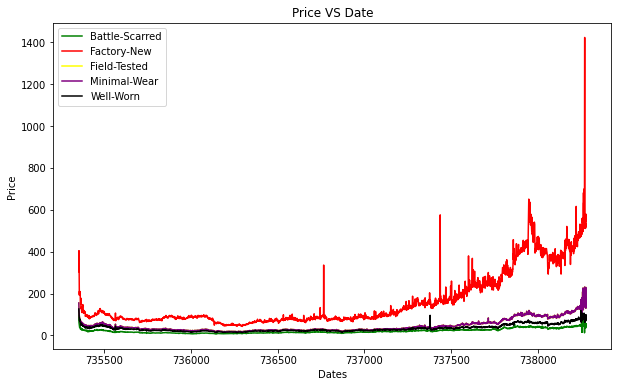

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Price VS Date')
plt.xlabel('Dates')
plt.ylabel('Price')
plt.plot(item.loc[item['ext_Battle-Scarred']==1]['Date'], item.loc[item['ext_Battle-Scarred']==1]['Price'], color='green', label='Battle-Scarred')
plt.plot(item.loc[item['ext_Factory-New']==1]['Date'], item.loc[item['ext_Factory-New']==1]['Price'], color='red', label="Factory-New")
plt.plot(item.loc[item['ext_Field-Tested']==1]['Date'], item.loc[item['ext_Field-Tested']==1]['Price'], color='yellow', label="Field-Tested")
plt.plot(item.loc[item['ext_Minimal Wear']==1]['Date'], item.loc[item['ext_Minimal Wear']==1]['Price'], color='purple', label="Minimal-Wear")
plt.plot(item.loc[item['ext_Well-Worn']==1]['Date'], item.loc[item['ext_Well-Worn']==1]['Price'], color='black', label="Well-Worn")
plt.legend()
plt.show()

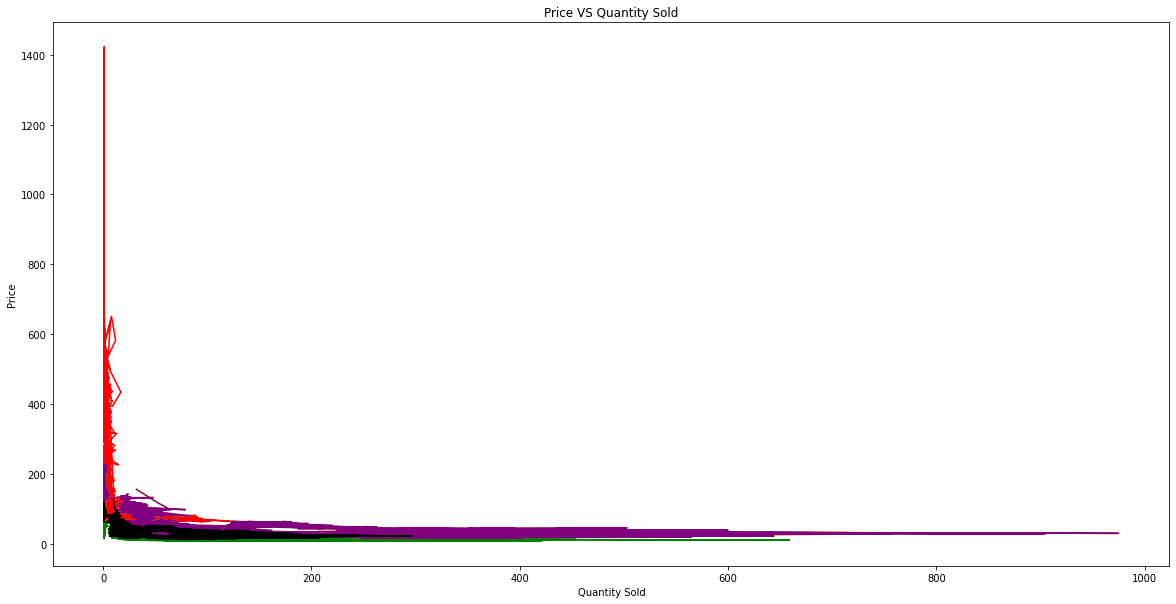

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Price VS Quantity Sold')
plt.ylabel('Price')
plt.xlabel('Quantity Sold')
plt.plot(item.loc[item['ext_Battle-Scarred']==1]['Quantity Sold'], item.loc[item['ext_Battle-Scarred']==1]['Price'], color='green')
plt.plot(item.loc[item['ext_Factory-New']==1]['Quantity Sold'], item.loc[item['ext_Factory-New']==1]['Price'], color='red')
plt.plot(item.loc[item['ext_Field-Tested']==1]['Quantity Sold'], item.loc[item['ext_Field-Tested']==1]['Price'], color='yellow')
plt.plot(item.loc[item['ext_Minimal Wear']==1]['Quantity Sold'], item.loc[item['ext_Minimal Wear']==1]['Price'], color='purple')
plt.plot(item.loc[item['ext_Well-Worn']==1]['Quantity Sold'], item.loc[item['ext_Well-Worn']==1]['Price'], color='black')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56683c5710>,
      dtype=object)

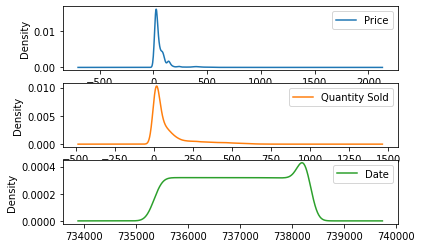

In [ ]:
#Density plots
item[['Price', 'Quantity Sold', 'Date']].plot(kind='density', subplots=True, sharex=False)

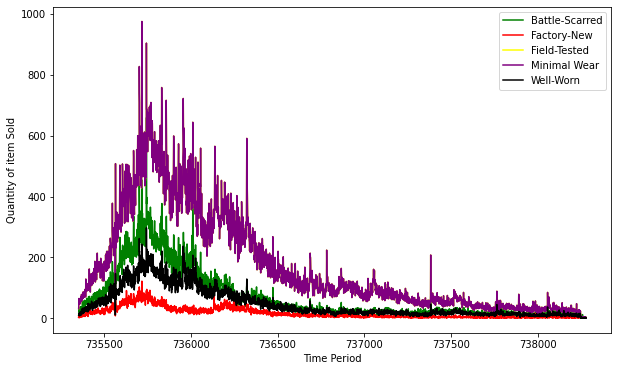

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Time Period')
plt.ylabel('Quantity of item Sold')
plt.plot(item.loc[item['ext_Battle-Scarred']==1]['Date'], item.loc[item['ext_Battle-Scarred']==1]['Quantity Sold'], color='green', label="Battle-Scarred")
plt.plot(item.loc[item['ext_Factory-New']==1]['Date'], item.loc[item['ext_Factory-New']==1]['Quantity Sold'], color='red', label='Factory-New')
plt.plot(item.loc[item['ext_Field-Tested']==1]['Date'], item.loc[item['ext_Field-Tested']==1]['Quantity Sold'], color='yellow', label='Field-Tested')
plt.plot(item.loc[item['ext_Minimal Wear']==1]['Date'], item.loc[item['ext_Minimal Wear']==1]['Quantity Sold'], color='purple', label='Minimal Wear')
plt.plot(item.loc[item['ext_Well-Worn']==1]['Date'], item.loc[item['ext_Well-Worn']==1]['Quantity Sold'], color='black', label='Well-Worn')
plt.legend()
plt.show()

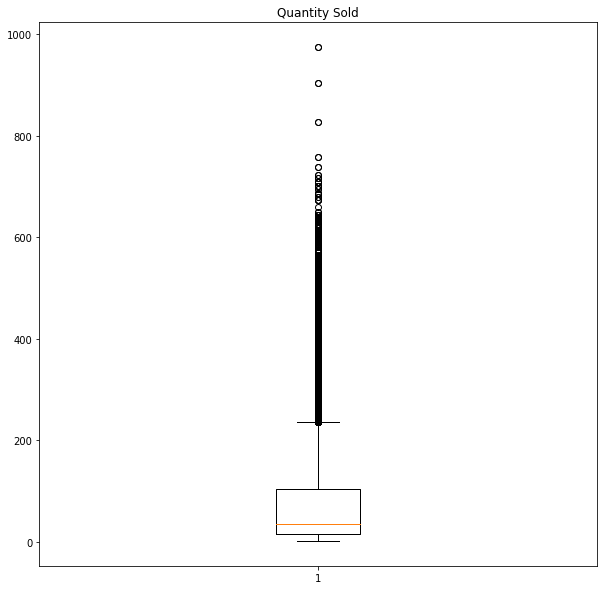

In [ ]:
#box whisker's plot
#item.plot(kind='box', subplots=True, sharex=False, sharey=False)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(item['Quantity Sold'])
ax.set_title('Quantity Sold')
plt.show()
#ax.boxplot(item['Price'])
#plt.show()

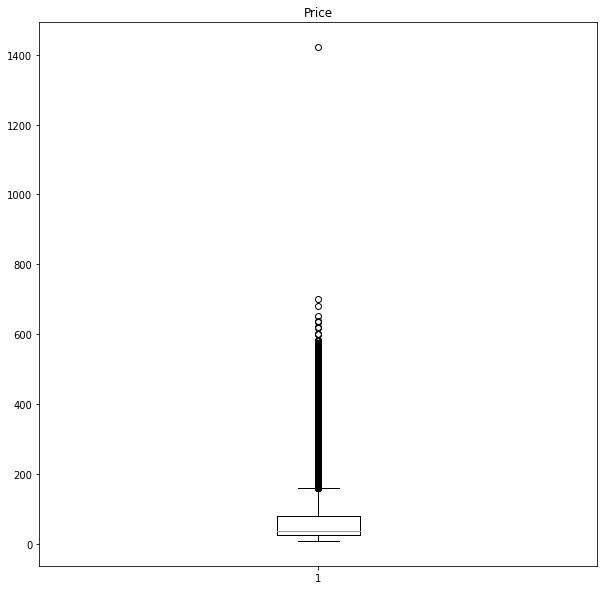

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Price')
ax.boxplot(item['Price'])
plt.show()

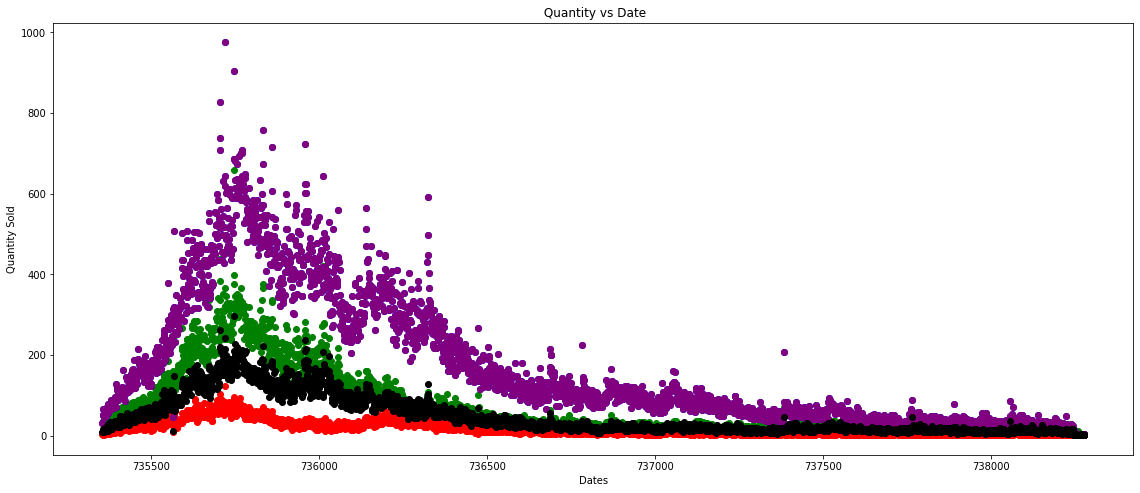

In [ ]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_axes([0,0,1,1])
plt.scatter(item.loc[item['ext_Battle-Scarred']==1]['Date'], item.loc[item['ext_Battle-Scarred']==1]['Quantity Sold'], color='green')
plt.scatter(item.loc[item['ext_Factory-New']==1]['Date'], item.loc[item['ext_Factory-New']==1]['Quantity Sold'], color='red')
plt.scatter(item.loc[item['ext_Field-Tested']==1]['Date'], item.loc[item['ext_Field-Tested']==1]['Quantity Sold'], color='blue')
plt.scatter(item.loc[item['ext_Minimal Wear']==1]['Date'], item.loc[item['ext_Minimal Wear']==1]['Quantity Sold'], color='purple')
plt.scatter(item.loc[item['ext_Well-Worn']==1]['Date'], item.loc[item['ext_Well-Worn']==1]['Quantity Sold'], color='black')
ax.set_xlabel('Dates')
ax.set_ylabel('Quantity Sold')
ax.set_title(' Quantity vs Date')
plt.show()

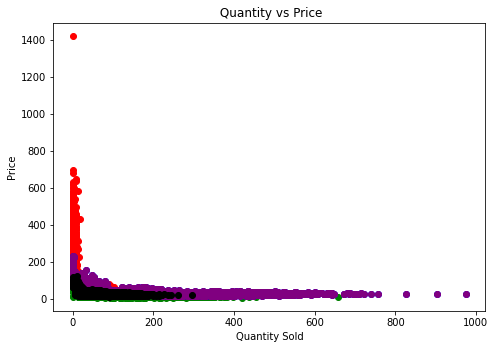

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.scatter(item.loc[item['ext_Battle-Scarred']==1]['Quantity Sold'], item.loc[item['ext_Battle-Scarred']==1]['Price'], color='green')
plt.scatter(item.loc[item['ext_Factory-New']==1]['Quantity Sold'], item.loc[item['ext_Factory-New']==1]['Price'], color='red')
plt.scatter(item.loc[item['ext_Field-Tested']==1]['Quantity Sold'], item.loc[item['ext_Field-Tested']==1]['Price'], color='blue')
plt.scatter(item.loc[item['ext_Minimal Wear']==1]['Quantity Sold'], item.loc[item['ext_Minimal Wear']==1]['Price'], color='purple')
plt.scatter(item.loc[item['ext_Well-Worn']==1]['Quantity Sold'], item.loc[item['ext_Well-Worn']==1]['Price'], color='black')
ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Price')
ax.set_title(' Quantity vs Price')
plt.show()

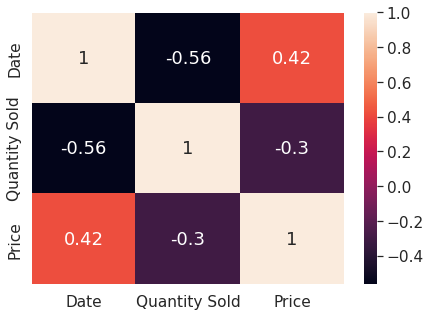

In [ ]:
#corr matrix
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
cm=item[['Date', 'Quantity Sold', 'Price']].corr()
sns.heatmap(cm, annot=True, annot_kws={"size": 18})

###Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc=MinMaxScaler()
sc.fit(X)
X_=sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=0)

#Models

##To check accuracy of models we create a function

In [13]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:

def print_metrics(M):
  scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
  accuracy = cross_validate(M, X, y, scoring=scoring, cv = 10)
  accuracy['test_r2']=np.mean(accuracy['test_r2'])
  accuracy['test_neg_mean_absolute_error']=np.mean(accuracy['test_neg_mean_absolute_error'])
  accuracy['test_neg_mean_squared_error']=np.mean(accuracy['test_neg_mean_squared_error'])
  accuracy['test_neg_root_mean_squared_error']=np.mean(accuracy['test_neg_root_mean_squared_error'])
  print('R2 score', accuracy['test_r2'])
  print('MAE', accuracy['test_neg_mean_absolute_error'])
  print('MSE', accuracy['test_neg_mean_squared_error'])
  print('RMSE', accuracy['test_neg_root_mean_squared_error'])


##Multivariate Linear Regression

In [ ]:
reg1=linear_model.LinearRegression()
reg1.fit(X_train, np.array(y_train).reshape(-1,1))

LinearRegression()

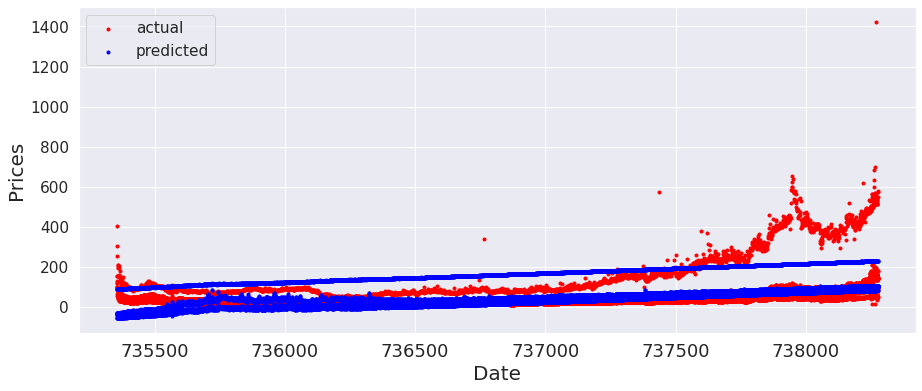

In [ ]:
plt.figure(figsize=(15,6))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Prices', fontsize=20)
plt.scatter(item.Date, item.Price, color='red', marker='.', label="actual")
plt.scatter(item.Date, reg1.predict(X_), color='blue', marker='.', label="predicted")
plt.legend()
plt.show()

Accuracy

In [ ]:
test_pred = reg1.predict(X_test)
train_pred = reg1.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 33.11292849055348
MSE: 2931.6213807298404
RMSE: 54.144449214391685
R2 Square 0.5493248659030605
__________________________________
Train set evaluation:
_____________________________________
MAE: 33.10570839179841
MSE: 2660.8692529130794
RMSE: 51.58361419009994
R2 Square 0.5717445827348613
__________________________________


In [ ]:
mlr=linear_model.LinearRegression()
print_metrics(mlr)

R2 score -22.332770484417058
MAE -55.2460921544274
MSE -6337.442017680707
RMSE -65.41908581939364


##Polynomial Model Regression

Finding the right degrees 

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [17]:
maxdegree=7 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(X_test)
    lr=linear_model.LinearRegression(fit_intercept=False)
    model=lr.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=6,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))

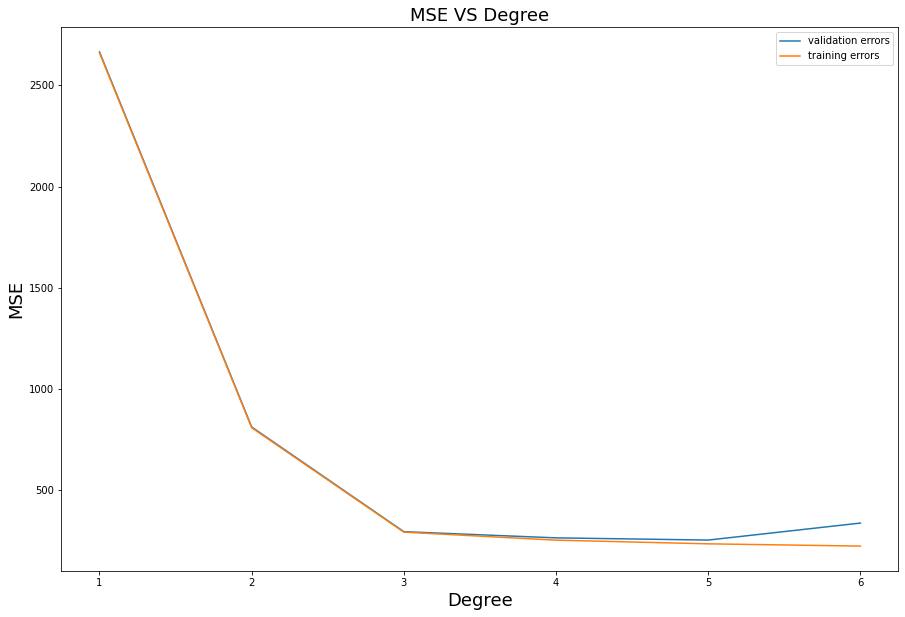

In [19]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(range(1,maxdegree),cross_validation_error, label="validation errors")
ax.plot(range(1, maxdegree), training_error, label="training errors")
ax.set_xlabel('Degree',fontsize=18)
ax.set_ylabel('MSE',fontsize=18)
ax.set_title('MSE VS Degree',fontsize=18)
plt.legend()
plt.show()

In [ ]:
def findOptiPara(trainX, trainY, testX, testY):
  for i in range(2,6):
    poly = PolynomialFeatures(degree=i, include_bias=True)
    x_train_trans = poly.fit_transform(trainX)
    x_test_trans = poly.transform(testX)
    lr = linear_model.LinearRegression()
    lr.fit(x_train_trans, trainY)
    y_pred = lr.predict(x_test_trans)
    print("degree="+ str(i) +" r2 score="+str(metrics.r2_score(y_test, y_pred)))
    ##Plot graph
    #x = poly.transform(X)
    #lr = LinearRegression()
    #lr.fit(x, y)
    #z=lr.predict(x)
    #plt.figure(i)
    #plt.xlabel('Date')
    #plt.ylabel('Prices')
    #plt.scatter(item.Date, item.Price, color='red', marker='+') 
    #plt.plot(item.Date, z, color='blue')

In [ ]:
findOptiPara(X_train, y_train, X_test, y_test)

degree=2 r2 score=0.8480336992044566
degree=3 r2 score=0.9278317865720875
degree=4 r2 score=0.9263698420322499
degree=5 r2 score=0.9353788203012913


In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr = linear_model.LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

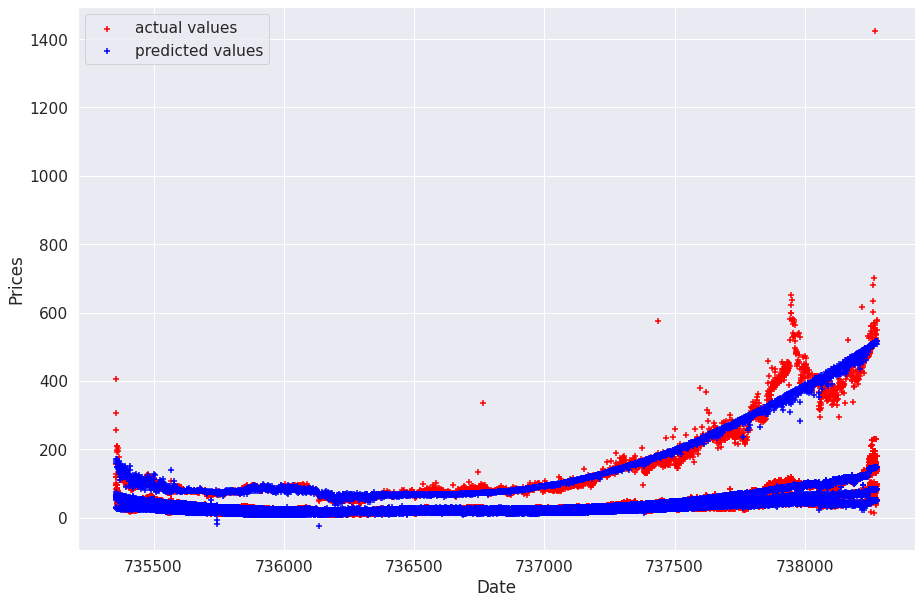

In [ ]:
z=lr.predict(poly.transform(X_))
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.scatter(item['Date'], y, color='red', marker='+', label="actual values")
plt.scatter(item['Date'], z, color='blue', marker='+', label="predicted values")
plt.legend()
plt.show()

Accuracy

In [ ]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, lr.predict(x_train_trans))

Test set evaluation:
_____________________________________
MAE: 6.785682228445851
MSE: 457.568173726576
RMSE: 21.39084322149494
R2 Square 0.9296585161343794
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.619786338530776
MSE: 252.9915068928328
RMSE: 15.90570673980986
R2 Square 0.9592821093218648
__________________________________


In [ ]:
scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']
accuracy = cross_validate(lr, poly.transform(X), y, scoring=scoring, cv = 10)
accuracy['test_r2']=np.mean(accuracy['test_r2'])
accuracy['test_neg_mean_absolute_error']=np.mean(accuracy['test_neg_mean_absolute_error'])
accuracy['test_neg_mean_squared_error']=np.mean(accuracy['test_neg_mean_squared_error'])
accuracy['test_neg_root_mean_squared_error']=np.mean(accuracy['test_neg_root_mean_squared_error'])
print('R2 score', accuracy['test_r2'])
print('MAE', accuracy['test_neg_mean_absolute_error'])
print('MSE', accuracy['test_neg_mean_squared_error'])
print('RMSE', accuracy['test_neg_root_mean_squared_error'])

R2 score -901.6311359361911
MAE -186.94893379489147
MSE -223808.25649780146
RMSE -320.1112927221476


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

###Hyper param tuning

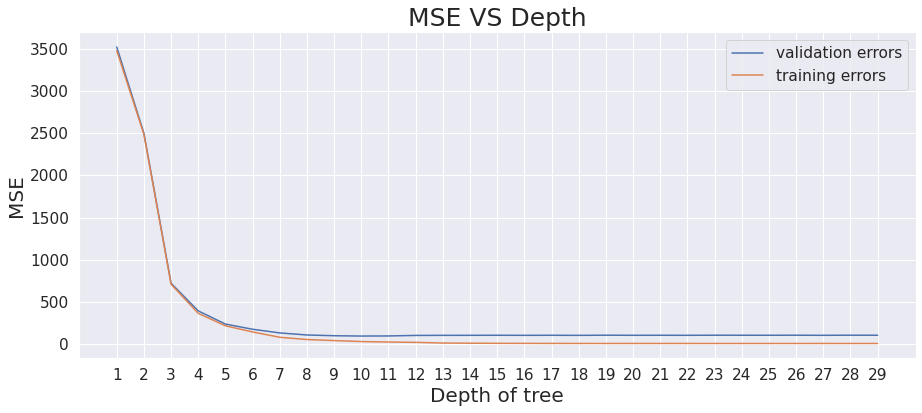

In [ ]:
maxdepth=30 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdepth):
    re=DecisionTreeRegressor(max_depth=d)
    re.fit(X_train, y_train)
    y_train_pred=re.predict(X_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(re,X_train,y_train,scoring='neg_mean_squared_error',cv=6,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(15,6))
ax.plot(range(1,maxdepth),cross_validation_error, label="validation errors")
ax.plot(range(1, maxdepth), training_error, label="training errors")
ax.set_xlabel('Depth of tree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Depth',fontsize=25)
ax.set_xticks(range(1,maxdepth))
plt.legend()
plt.show()

In [ ]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [ ]:
print(regressor.tree_.max_depth)

3


In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train,regressor.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, y_pred)

----------On training dataset----------------
MAE: 16.384412708668453
MSE: 710.0872674134001
RMSE: 26.64746268246566
R2 Square 0.8857145202952512
__________________________________
-------------On testing dataset--------------
MAE: 16.85589169065576
MSE: 932.8315392868222
RMSE: 30.54229099604059
R2 Square 0.8565967686614151
__________________________________


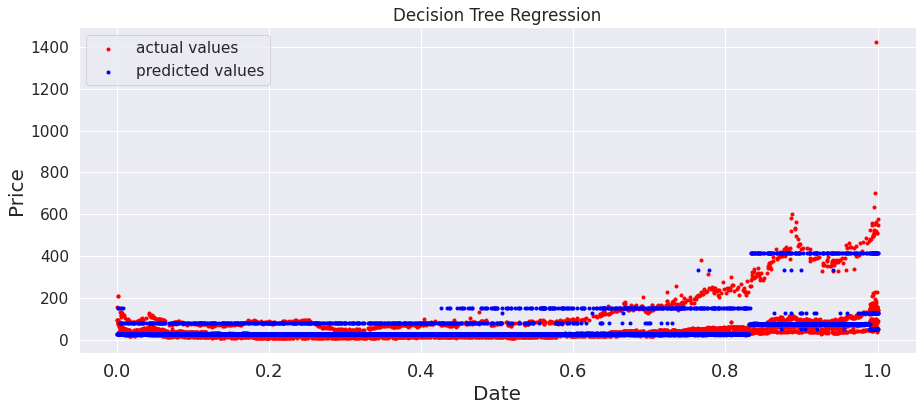

In [ ]:
# X_grid = np.arange(min(X_test[:,0]), max(X_test[:,0]))
# X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X_test[:,0], y_test, color = 'red', marker='.', label="actual values")
plt.scatter(X_test[:,0], y_pred, color = 'blue', marker='.', label="predicted values")
plt.title('Decision Tree Regression')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend()
plt.show()

In [ ]:
decision_score=regressor.score(X_test,y_test)
expl_tr = explained_variance_score(regressor.predict(X_test),y_test)
print(decision_score, expl_tr)

0.855678340980693 0.8340280320322796


In [ ]:
##feature ranking
feature_list=X.columns
feature_imp=pd.Series(regressor.feature_importances_, index=feature_list).sort_values()
print(feature_imp)

rar_Covert            0.000000
ext_Minimal Wear      0.000000
ext_Field-Tested      0.000000
ext_Well-Worn         0.000000
ext_Battle-Scarred    0.015489
ext_Factory-New       0.178464
Date                  0.314563
Quantity Sold         0.491483
dtype: float64


##Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30, max_depth=6)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train,rf.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, rf.predict(X_test))

----------On training dataset----------------
MAE: 5.8579202429915
MSE: 126.23853084803368
RMSE: 11.235592144966533
R2 Square 0.9796824535275169
__________________________________
-------------On testing dataset--------------
MAE: 6.065729802806388
MSE: 281.7917083014689
RMSE: 16.786652683053546
R2 Square 0.9566804510429128
__________________________________


In [ ]:
##feature ranking
feature_list=X.columns
feature_imp=pd.Series(regressor.feature_importances_, index=feature_list).sort_values()
print(feature_imp)

rar_Covert            0.000000
ext_Minimal Wear      0.000000
ext_Field-Tested      0.000000
ext_Well-Worn         0.000000
ext_Battle-Scarred    0.015489
ext_Factory-New       0.178464
Date                  0.314563
Quantity Sold         0.491483
dtype: float64


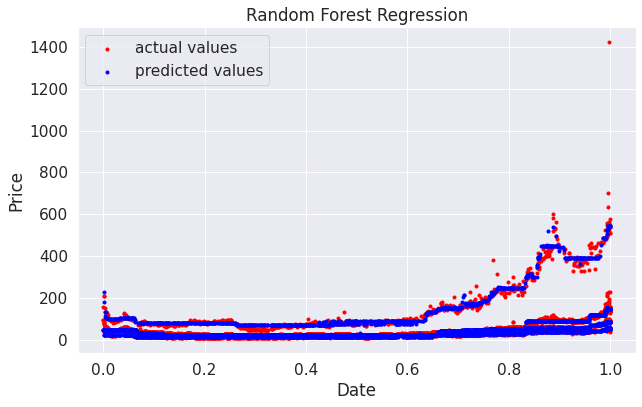

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], y_test, color = 'red', marker='.',label='actual values')
plt.scatter(X_test[:,0], y_pred, color = 'blue', marker='.',label="predicted values")
plt.title('Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

###Hyperparameter tuning of random forest

In [ ]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500]
# train_results = []
# test_results = []
# for estimator in n_estimators:
#    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    y_pred = rf.predict(X_test)
#    print('---training----'+' {}'.format(estimator))
#    print_evaluate(y_train, train_pred)
#    print('-----Testing-----')
#    print_evaluate(y_test, y_pred)

In [ ]:
# max_depths = np.linspace(1, 25, 25, endpoint=True)
# train_results = []
# test_results = []
# for md in max_depths:
#    rf = RandomForestRegressor(max_depth=md, n_jobs=-1)
#    rf.fit(X_train, y_train)
#    train_pred = rf.predict(X_train)
#    y_pred = rf.predict(X_test)
#    print('Training'+' {}'.format(md))
#    print_evaluate(y_train, train_pred)
#    print('Testing')
#    print_evaluate(y_test, y_pred)

In [ ]:
model = RandomForestRegressor()
parameters = {    'n_estimators' : range(10,100,10),
                  'max_depth'    : range(2,7)
                 }
grid_rf = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_rf.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_rf.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=6, n_estimators=30)

 The best score across ALL searched params:
 -140.9679602891533

 The best parameters across ALL searched params:
 {'max_depth': 6, 'n_estimators': 30}


##XGBOOST Regressor

In [ ]:
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Hyper parameter tuning

{    'n_estimators' : range(10,100,10),
                  'max_depth'    : range(2,7)
                 }

In [ ]:
maxdepth= range(3,7) # The maximum degree we would like to test
trees= range(30,100,10)
s=[(i,j) for i in maxdepth for j in trees]
training_error=[]
cross_validation_error=[]
c=0
for d,t in s:
    re=XGBRegressor(max_depth=d, n_estimators=t, silent=True)
    re.fit(X_train, y_train)
    ypred=re.predict(X_train)
    mse_train=mean_squared_error(y_train,ypred)
    re=XGBRegressor(max_depth=d, n_estimators=t, silent=True)
    cve=cross_validate(re,X_train,y_train,scoring='neg_mean_squared_error',cv=6,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    c+=1
    if (d,t)==(5,90):break


In [ ]:
s.index((5,90))

20

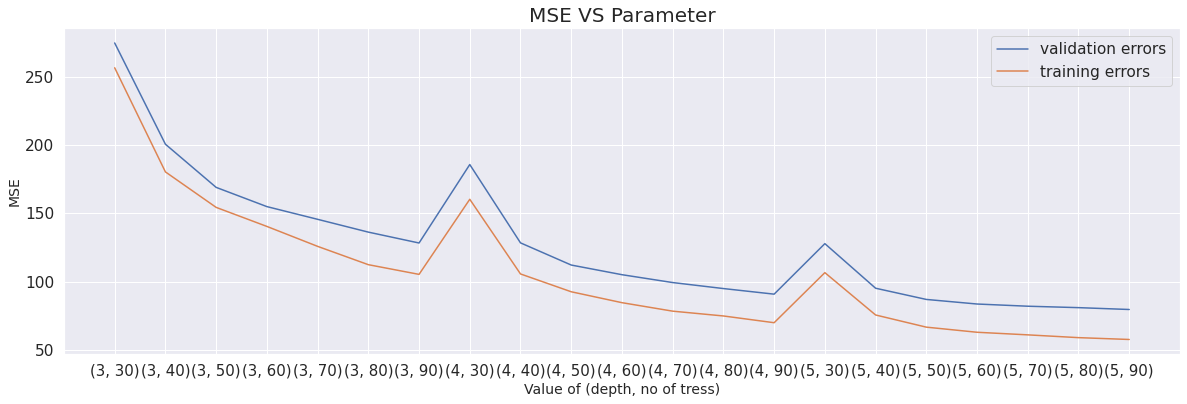

In [ ]:
fig,ax=plt.subplots(figsize=(20,6))
ax.plot(range(c),cross_validation_error, label="validation errors")
ax.plot(range(c), training_error, label="training errors")
plt.xticks(range(c), s[:21], fontsize=15)
ax.set_xlabel('Value of (depth, no of tress)',fontsize=14)
ax.set_ylabel('MSE',fontsize=14)
ax.set_title('MSE VS Parameter',fontsize=20)
# ax.set_xticks(range(1,maxdepth))
plt.legend()
plt.show()

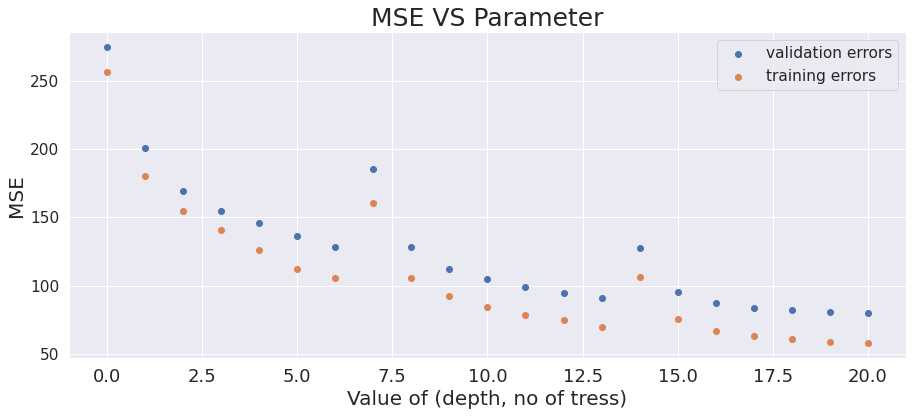

In [ ]:
  fig,ax=plt.subplots(figsize=(15,6))
ax.scatter(range(c),cross_validation_error, label="validation errors")
ax.scatter(range(c), training_error, label="training errors")
ax.set_xlabel('Value of (depth, no of tress)',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Parameter',fontsize=25)
# ax.set_xticks(range(1,maxdepth))
plt.legend()
plt.show()

In [ ]:
xg_reg = XGBRegressor(max_depth=4, n_estimators=90, silent=True)
xg_reg.fit(X_train, y_train)
y_pred=xg_reg.predict(X_test)

Accuracy

In [ ]:
print("---------On training Dataset---------")
print_evaluate(y_train, xg_reg.predict(X_train))
print("--------On testing Dataset-----------")
print_evaluate(y_test, y_pred)

---------On training Dataset---------
MAE: 8.451045591527606
MSE: 256.43507591368405
RMSE: 16.01359035050179
R2 Square 0.9587278817564586
__________________________________
--------On testing Dataset-----------
MAE: 8.91012398568211
MSE: 456.0140957980715
RMSE: 21.35448654962398
R2 Square 0.9298974229329959
__________________________________


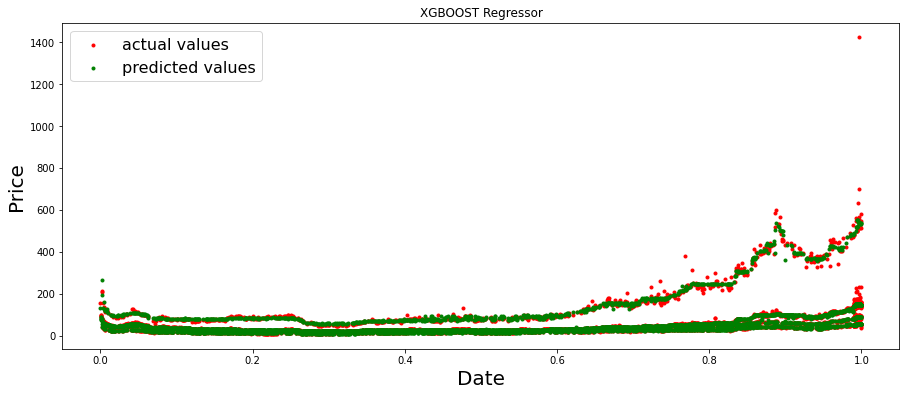

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(X_test[:,0], y_test, color = 'red', marker='.', label="actual values")
plt.scatter(X_test[:,0], y_pred, color = 'green', marker='.', label="predicted values")
plt.title('XGBOOST Regressor')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend(prop={"size":16})
plt.show()

###Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
model = XGBRegressor()
parameters = {    'n_estimators' : range(10,100,10),
                  'max_depth'    : range(2,7)
                 }
grid_xgbr = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_xgbr.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_xgbr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_xgbr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgbr.best_params_)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X, y)
# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))
# # plot
# plt.errorbar(n_estimators, means, yerr=stds)
# plt.title("XGBoost n_estimators vs RMSE")
# plt.xlabel('n_estimators')
# plt.ylabel('RMSE')

[07:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=6, n_estimators=90)

 The best score across ALL searched params:
 -79.583519333034

 The best parameters across ALL searched params:
 {'max_depth': 6, 'n_estimators': 90}


##Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR()
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
svr = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
svr.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", svr.best_estimator_)
print("\n The best score across ALL searched params:\n", svr.best_score_)
print("\n The best parameters across ALL searched params:\n", svr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(kernel='poly')

 The best score across ALL searched params:
 -731.7905560399873

 The best parameters across ALL searched params:
 {'kernel': 'poly'}


In [ ]:
c= range(# The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(X_test)
    lr=linear_model.LinearRegression(fit_intercept=False)
    model=lr.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=6,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))

In [ ]:
svmModel=SVR(kernel='rbf', C=100, gamma=1)
svmModel.fit(X_train, y_train)
y_pred=svmModel.predict(X_test)

In [ ]:
svmModel=SVR(kernel='poly')
svmModel.fit(X_train, y_train)
y_pred=svmModel.predict(X_test)

In [ ]:
print("----------On training dataset----------------")
print_evaluate(y_train, svmModel.predict(X_train))
print("-------------On testing dataset--------------")
print_evaluate( y_test, y_pred)

----------On training dataset----------------
MAE: 6.448570319912338
MSE: 273.0566562246745
RMSE: 16.524426048267895
R2 Square 0.9557807210862854
__________________________________
-------------On testing dataset--------------
MAE: 6.680463429579375
MSE: 477.0232622818101
RMSE: 21.840862214706867
R2 Square 0.9276615114858862
__________________________________


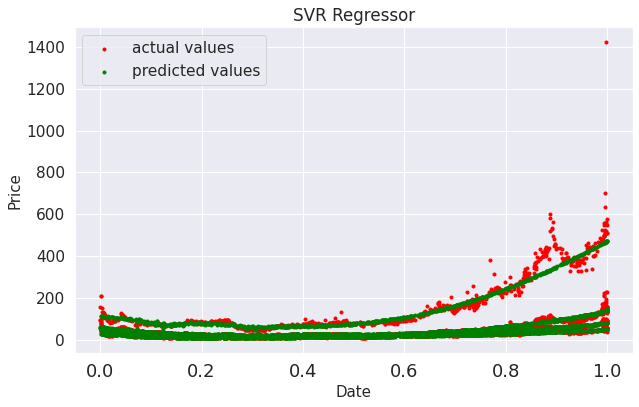

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], y_test, color = 'red', marker='.', label='actual values')
plt.scatter(X_test[:,0], y_pred, color = 'green', marker='.', label='predicted values')
plt.title('SVR Regressor')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()

##Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
 print(X_train[1,:])

[0.30263608 0.35420945 0.         1.         0.         0.
 0.        ]


In [ ]:
ann = Sequential()
ann.add(Dense(3, kernel_initializer='normal', input_dim = X_train.shape[1] ,activation='sigmoid'))
ann.add(Dense(1, kernel_initializer='normal', activation='linear'))


In [ ]:
loss_fn=keras.losses.MeanSquaredError()
ann.compile(loss=loss_fn, optimizer='sgd', metrics=[keras.metrics.MeanSquaredError()])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlyStop = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)
def scheduler(epoch, lr):
     if epoch < 50:
      return lr
     else:
       return lr * tf.math.exp(-0.1)
learningR = keras.callbacks.LearningRateScheduler(scheduler)
callbacks_list = [checkpoint, rlrop,earlyStop]

In [ ]:
history=ann.fit(X_train, y_train, epochs=1000, batch_size=250, validation_split = 0.3, callbacks=callbacks_list)

Epoch 1/1000
 1/31 [..............................] - ETA: 19s - loss: 7596.9277 - mean_squared_error: 7596.9277
Epoch 1: val_loss improved from inf to 5568.49902, saving model to Weights-001--5568.49902.hdf5
31/31 [==============================] - 1s 8ms/step - loss: 7112.5195 - mean_squared_error: 7112.5195 - val_loss: 5568.4990 - val_mean_squared_error: 5568.4990 - lr: 0.0100
Epoch 2/1000
24/31 [======================>.......] - ETA: 0s - loss: 5113.5742 - mean_squared_error: 5113.5742
Epoch 2: val_loss improved from 5568.49902 to 4162.61084, saving model to Weights-002--4162.61084.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 4686.1416 - mean_squared_error: 4686.1416 - val_loss: 4162.6108 - val_mean_squared_error: 4162.6108 - lr: 0.0100
Epoch 3/1000
31/31 [==============================] - ETA: 0s - loss: 3774.5728 - mean_squared_error: 3774.5728
Epoch 3: val_loss improved from 4162.61084 to 3549.70850, saving model to Weights-003--3549.70850.hdf5
31/31 [======

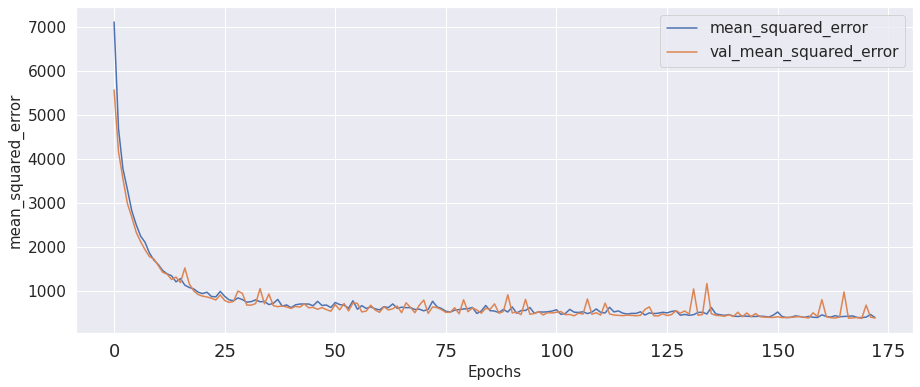

In [ ]:
def plot_history(history, key):
  plt.figure(figsize=(15,6))
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs", fontsize=15)
  plt.ylabel(key, fontsize=15)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

Accuracy

In [ ]:
print("---------On training Dataset---------")
print_evaluate(y_train, ann.predict(X_train))
print("--------On testing Dataset-----------")
print_evaluate(y_test, ann.predict(X_test))

---------On training Dataset---------
MAE: 10.585048255327346
MSE: 347.54322011922636
RMSE: 18.64251110015028
R2 Square 0.9440644193295539
__________________________________
--------On testing Dataset-----------
MAE: 10.817400397663784
MSE: 540.446063466496
RMSE: 23.247495853671982
R2 Square 0.9169177835426042
__________________________________


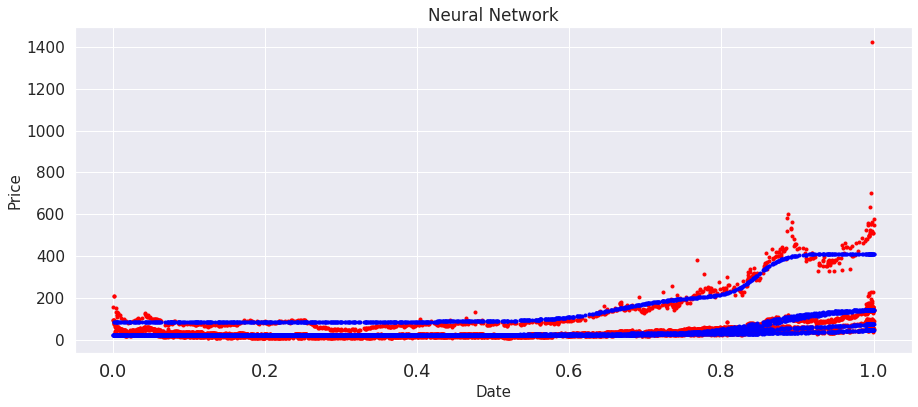

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(X_test[:,0], y_test, color = 'red', marker='.')
plt.scatter(X_test[:,0], ann.predict(X_test), color = 'blue', marker='.')
plt.title('Neural Network')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()